In [1]:
# Import all the necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Reset the pseudo random number generator to the same value.
seed = 42
np.random.seed(seed)
random.seed(seed)

In [3]:
def gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, mb_size):
    '''Mini-batch gradient descent version'''
    
    # Retrieve number of samples.
    N = len(y_noisy)
    
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*(N//mb_size)+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*(N//mb_size)+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Create array for storing gradient values.
    grad_hist = np.zeros((2, n_epochs*(N//mb_size)))

    # Mini-batch gradient-descent loop.
    inc = 0
    # Count the epochs.
    for e in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)

        # Count the iterations.
        for i in range(0, N//mb_size):

            # Randomly selecting one training example.
            start = i*mb_size
            end = mb_size*(i+1)
            batch_indexes = shuffled_data_set_indexes[start:end]
            xi = X[batch_indexes]
            yi = y_noisy[batch_indexes]

            # Calculate the approximation of the gradient.
            gradients = -(2.0/mb_size)*xi.T.dot(yi - xi.dot(a))
            
            # Update the weights.
            a = a - alpha*gradients

            # Calculate the MSE for the new weights.
            Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            # Store history.
            grad_hist[:, inc] = gradients.reshape(2,)
            a_hist[:, inc+1] = a.reshape(2,)

            # Increment the iteration.
            inc = inc + 1
            
    return a, Jgd, a_hist, grad_hist, inc

In [4]:
# Sets the number of examples.
N = 1000

# Features.
x1 = np.sqrt(100)*np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Create target function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Noisy function.
y_noisy = y + w

In [5]:
# Generate values for parameters.
M = 200
a1 = np.linspace(-12.0, 14.0, M)
a2 = np.linspace(-12.0, 14.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
        J[iter1, iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

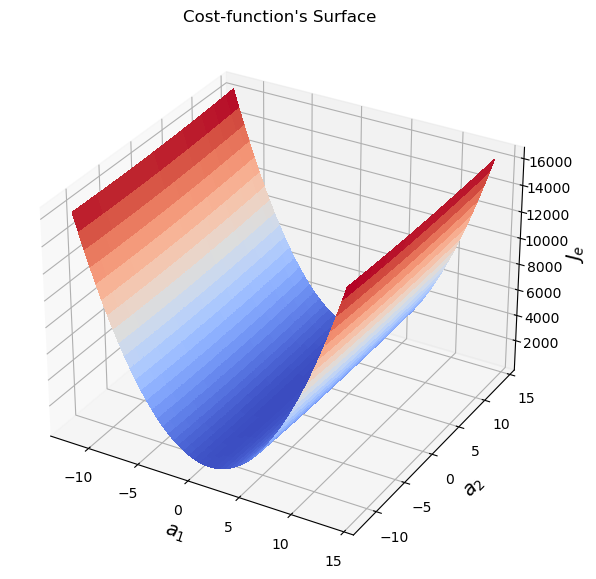

In [6]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_bgd.png", dpi=600)
#Show the plot.
plt.show()

In [7]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
yhat = X.dot(a_opt)
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

print('a0:', a_opt[0,0])
print('a1:', a_opt[1,0])
print('Joptimum:', Joptimum)

a0: 1.002194704393852
a1: 0.9902629792949663
Joptimum: 0.9656766303811875


In [8]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.005

# Maximum number of epochs.
n_epochs = 1000

# Mini-batch size.
mb_size = N

# Train with mini-batch gradiente descent.
a, Jgd, a_hist, grad_hist, iteration = gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, mb_size)

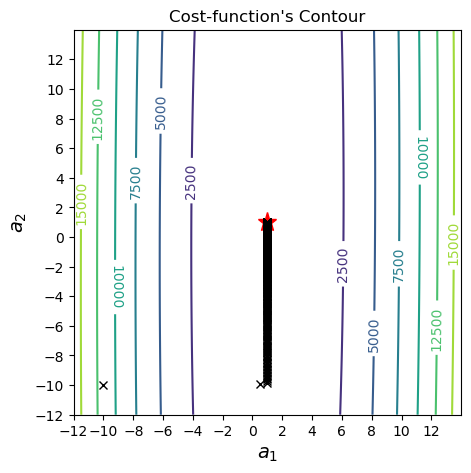

In [9]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
#plt.savefig("error_contour_bgd.png", dpi=600)
plt.show()

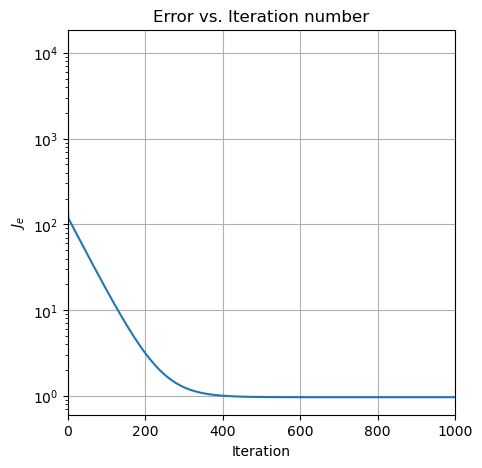

In [10]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.grid()
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

In [11]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: 1.002194704393852
a2_opt: 0.9902629792949663
a1_gd: 1.002192742359842
a2_gd: 0.9897739975799158


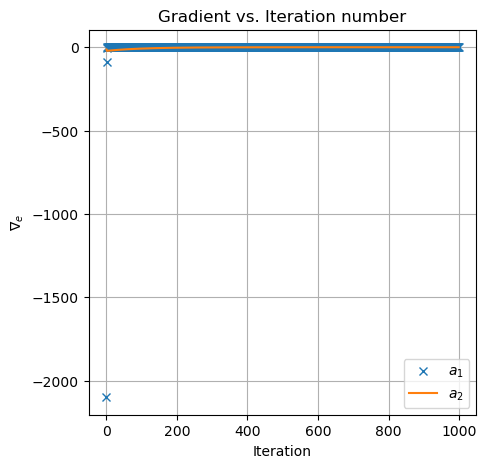

In [12]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.grid()
plt.show()